# Kickstarter

In [227]:
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
df2018 = pd.read_csv("/data/ks-projects-201801.csv")

In [53]:
# Take a look at the dataset
df2018.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [183]:
df2018.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,goal_pledge_ratio
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05,378661.000000
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,3.236121
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06,266.905405
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0.000000
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03,0.004533
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03,0.134640
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04,1.065400
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,104277.890000


## Plot Categorical Groupby

In [ ]:
top_20_categories = df2018.groupby("category").ID.count().sort_values(ascending=False).head(30)

In [55]:
# Select unique categories from dataset
df2018.currency.unique()

array(['GBP', 'USD', 'CAD', 'AUD', 'NOK', 'EUR', 'MXN', 'SEK', 'NZD',
       'CHF', 'DKK', 'HKD', 'SGD', 'JPY'], dtype=object)

In [70]:
# Plot the top 20 categories
def plot_column(column_name, number_of_items):
    top_n_categories = df2018.groupby(column_name).ID.count().sort_values(ascending=False).head(number_of_items)
    plt = top_n_categories.\
    plot(kind="barh", \
         figsize=(8,6), \
         title=f"Products by {column_name}")

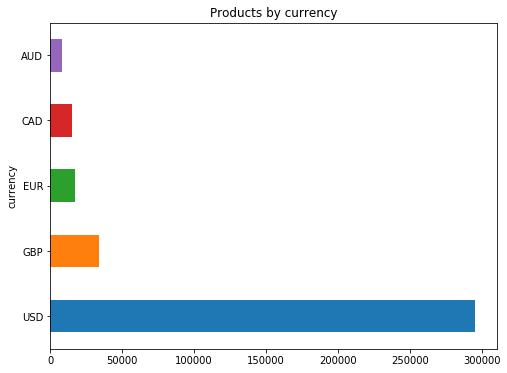

In [72]:
plot_column("currency", 5)

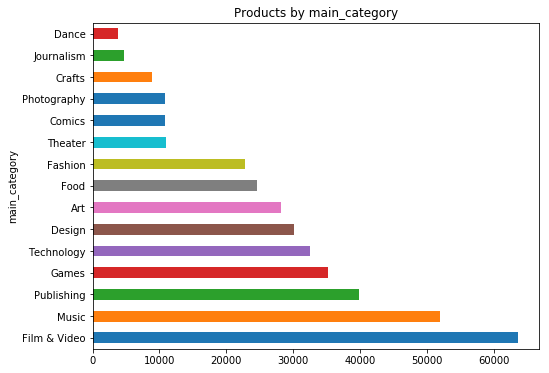

In [264]:
plot_column("main_category", 100)

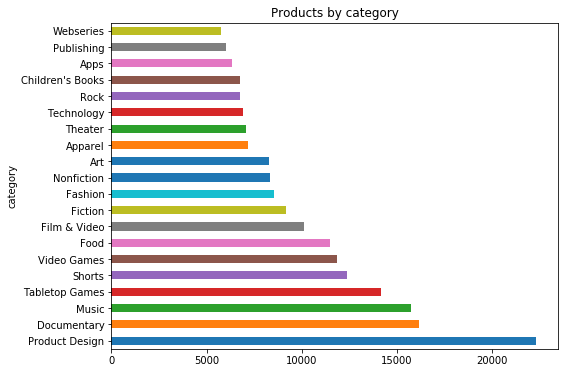

In [268]:
plot_column("category", 20)

In [85]:
def plot_column_df(df, column_name, number_of_items):
    top_n_categories = df.groupby(column_name).ID.count().sort_values(ascending=False).head(number_of_items)
    plt = top_n_categories.\
    plot(kind="barh", \
         figsize=(8,6), \
         title=f"Products by {column_name}")

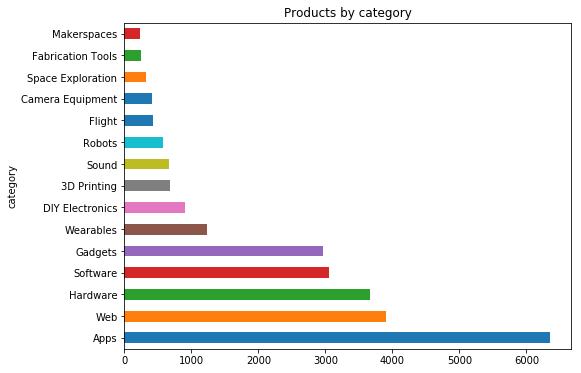

In [99]:
# Technology Category
tech_category = df2018[df2018.main_category == "Technology"]
tech_category_filtered = technology_category[technology_category != "Technology"]
plot_column_df(tech_category_filtered, "category", 20)

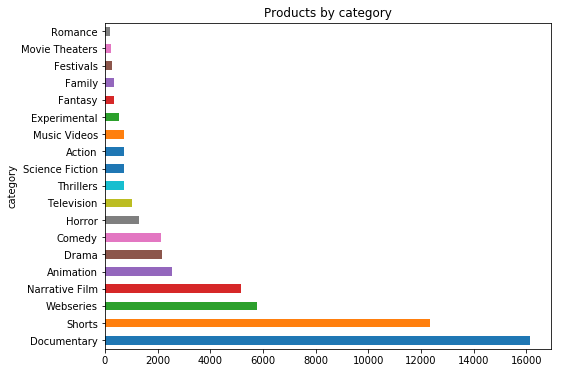

In [107]:
# Types of Films
film_category = df2018[df2018.main_category == "Film & Video"]
film_category_filtered = film_category[film_category != "Film & Video"]
plot_column_df(film_category_filtered,"category",20)

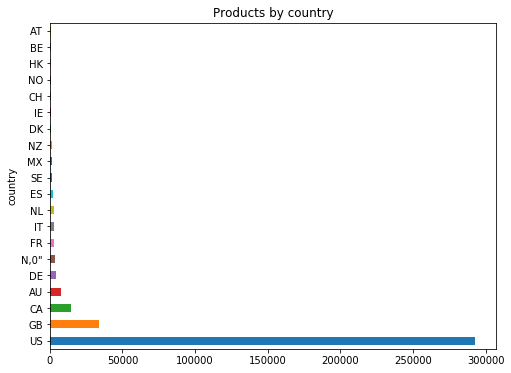

In [74]:
# Products by Country
plot_column("country", 20)

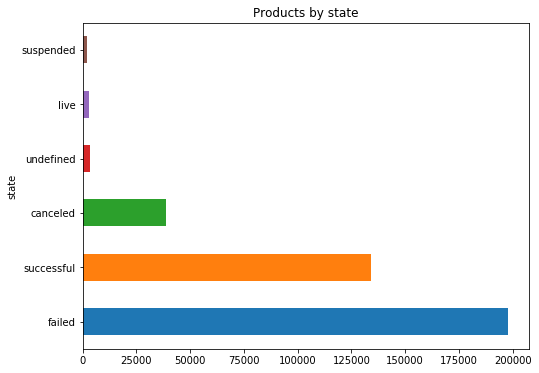

In [106]:
# Products by State
plot_column("state", 6)

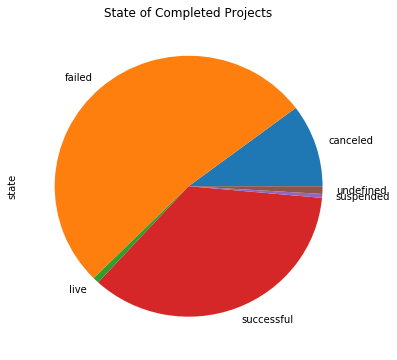

In [308]:
state_count = df2018.groupby('state').ID.count()
plt = state_count.plot(kind="pie"\
                      ,figsize=(6,6)\
                      ,title="State of Completed Projects",
                      label="state")

## Goals and Pledges

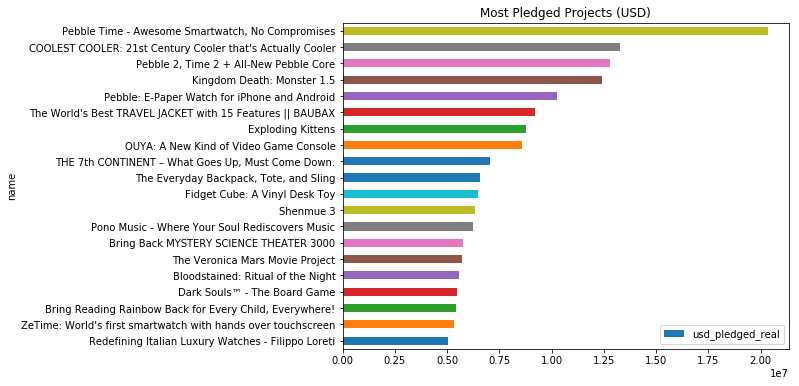

In [178]:
# Most Pledged
plt = df2018.sort_values("usd_pledged_real", ascending=True).tail(20)\
.plot(kind="barh",\
      x="name",\
      y="usd_pledged_real",\
    figsize=(8,6),\
     title="Most Pledged Projects (USD)")

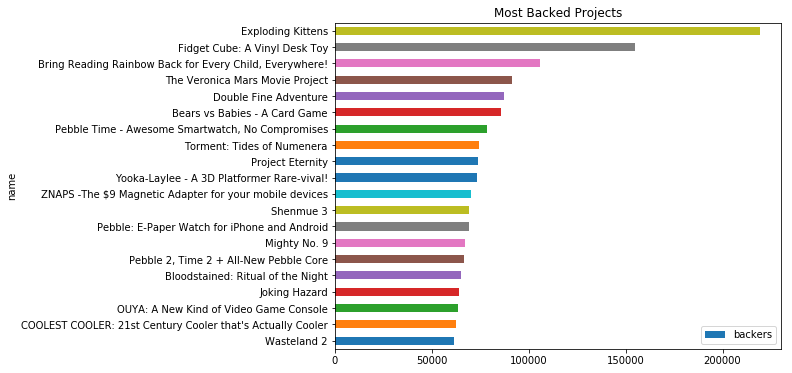

In [175]:
# Highest Backers
plt = df2018.sort_values("backers", ascending=True).tail(20)\
.plot(kind="barh",\
      x="name",\
      y="backers",\
      figsize=(8,6),\
     title="Most Backed Projects")

In [142]:
df2018["goal_pledge_ratio"] = df2018.usd_pledged_real / df2018.usd_goal_real

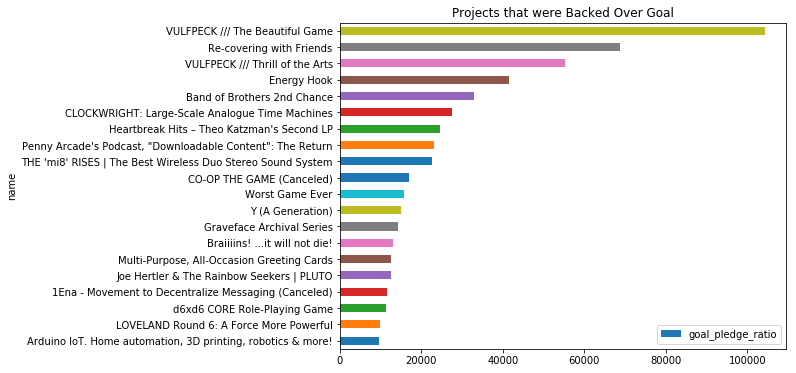

In [176]:
plt = df2018[df2018.goal_pledge_ratio != float('inf')].sort_values("goal_pledge_ratio", ascending=True).tail(20)\
.plot(kind="barh",\
      x="name",\
      y="goal_pledge_ratio",\
    figsize=(8,6),\
     title="Projects that were Backed Over Goal")

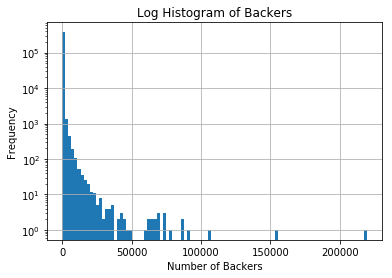

In [262]:
fig, ax = plt.subplots()
series = df2018.backers
series.hist(bins=100, bottom=0)
ax.set_yscale('log')
plt.title("Log Histogram of Backers")
plt.ylabel("Frequency")
plt.xlabel("Number of Backers")
plt.show()

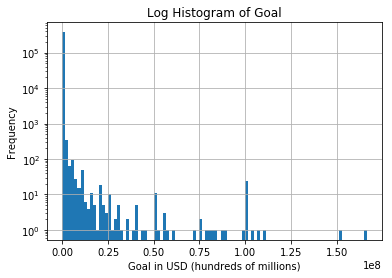

In [261]:
fig, ax = plt.subplots()
series = df2018.usd_goal_real
series.hist(bins=100, bottom=0)
ax.set_yscale('log')
plt.title("Log Histogram of Goal")
plt.ylabel("Frequency")
plt.xlabel("Goal in USD (hundreds of millions)")
plt.show()

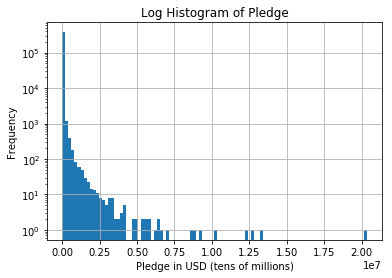

In [260]:
fig, ax = plt.subplots()
series = df2018.usd_pledged_real
series.hist(bins=100, bottom=0)
ax.set_yscale('log')
plt.title("Log Histogram of Pledge")
plt.ylabel("Frequency")
plt.xlabel("Pledge in USD (tens of millions)")
plt.show()